**Homework 1**


Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

In [233]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import scipy.stats as st
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**a. Graph the total Population vs Year**

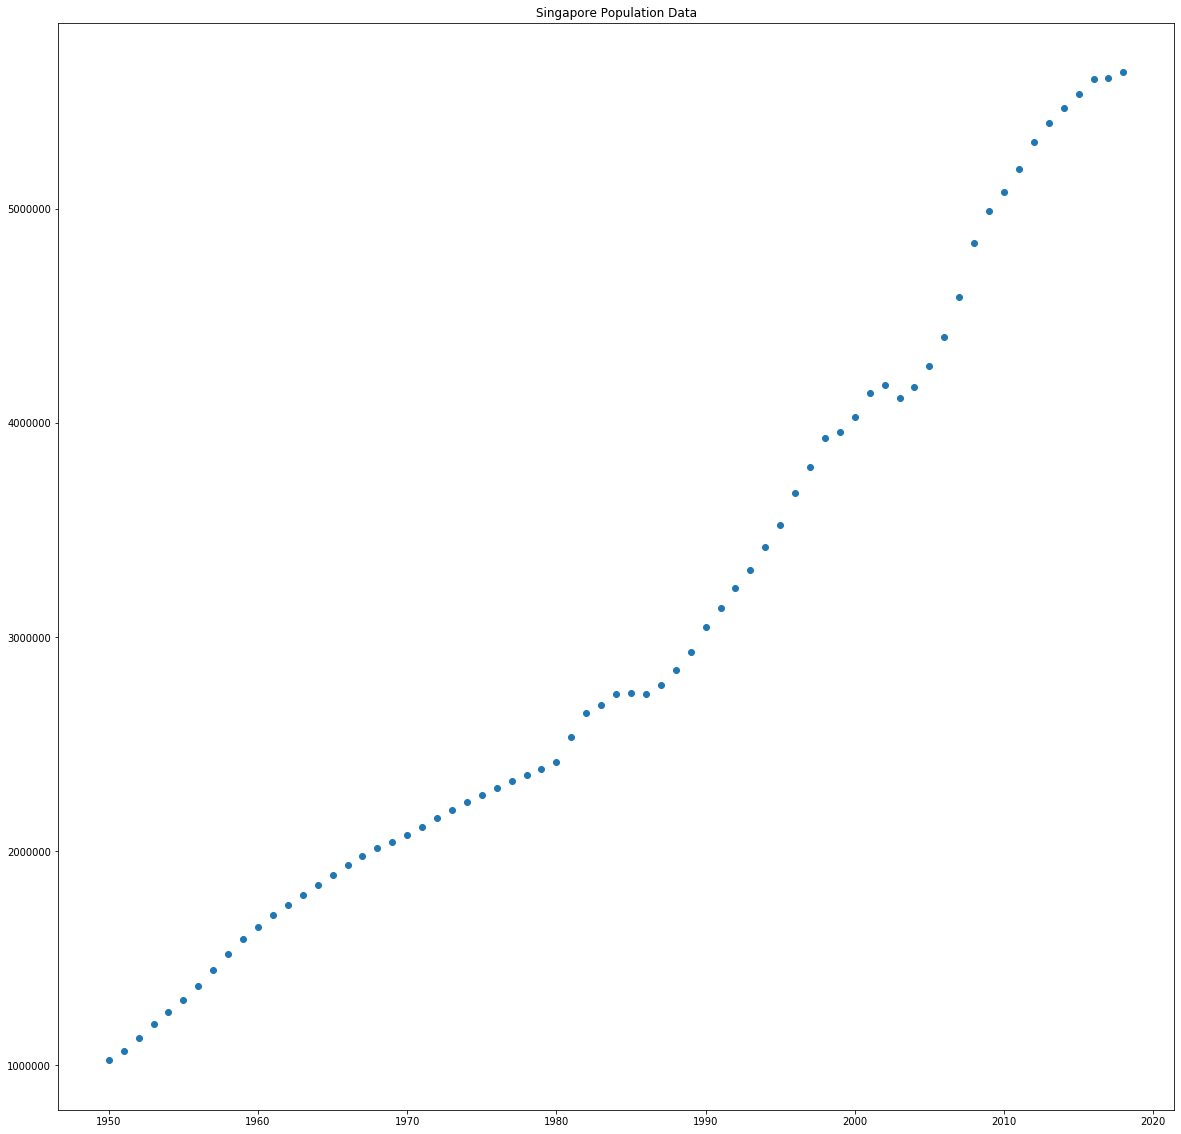

In [234]:
df = pd.read_csv('data.csv', thousands=',')

df.rename(columns={'Variables':'Year'}, 
                 inplace=True)
 
x = df['Year'].values.reshape(-1,1)
y = df['Population'].values.reshape(-1,1)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(title='Singapore Population Data')
ax1.plot(x,y,'o')




**b. Use linear regression to build an estimator of the population of Singapore in the future. Use the data for years 2013 and earlier as training data.**

In [235]:
#Split data into training and validation set

x_train = x[:-5]
x_test = x[-5:]

y_train = y[:-5]
y_test = y[-5:]


In [236]:
# Create Linear Regression Model
lr = lm.LinearRegression()

# Fit dataset into training model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**C. What are the slope and y-intercept of the best fit line? What is the mean squared error of the estimator on the training data?**

In [237]:

#To retrieve the intercept:
print('y-intercept:', (lr.intercept_[0]))

#To retrieve the slope:
print('slope:', lr.coef_[0][0])


#To retrieve the MSE for training data:
y_pred=lr.predict(x_train)
linear_train_metric=metrics.mean_squared_error(y_pred, y_train)
print('Mean Squared Error:', linear_train_metric)

y-intercept: -122692970.62939563
slope: 63343.22625915753
Mean Squared Error: 55496493545.957756


**d. Use years>2013 as test data and predict the data for those five years.What is the mean squared error of the estimator on the test data?**

   Year     Predicted   Actual
0  2014  4.880287e+06  5469724
1  2015  4.943630e+06  5535002
2  2016  5.006974e+06  5607283
3  2017  5.070317e+06  5612253
4  2018  5.133660e+06  5638676
Mean Squared Error: 321252803426.99133


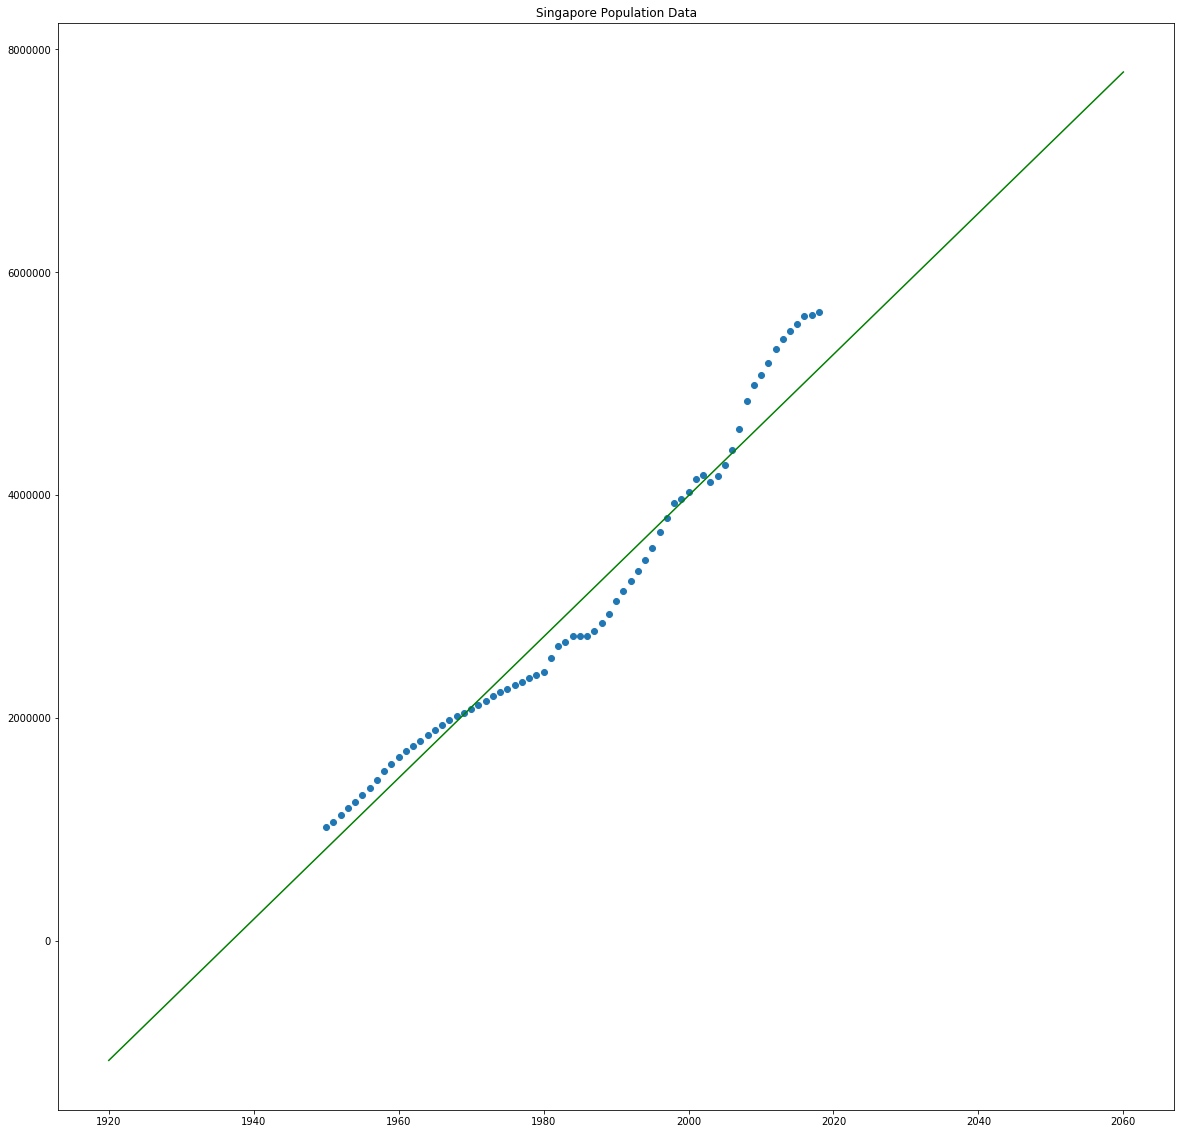

In [238]:
#Plot the predicted line
x_lr = np.linspace(1920, 2060, 14).reshape(-1,1)
y_lr = lr.predict(x_lr)

#plot model and original data in one graph for visualisation
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(title='Singapore Population Data')

ax1.plot(x,y,'o')
ax1.plot(x_lr,y_lr,'g')


#get predicted values from 2014-2018
pred = lr.predict(x_test)
table1 = pd.DataFrame({'Year': x_test.flatten(), 'Predicted': pred.flatten(), 'Actual': y_test.flatten()})
print (table1)

#save metric
linear_test_metric= metrics.mean_squared_error(pred, y_test)

#To retrieve the MSE of test data:
print('Mean Squared Error:', linear_test_metric)


**e. What is your estimate of Singapore’s population in 2030 and 2050? Do you think these estimates are reasonable?**

In [239]:
#prediction for 2030 and 2050

new_x = np.array([2030,2050]).reshape (-1,1)
new_lr= lr.predict(new_pred)
table2 = pd.DataFrame({'Year': new_x.flatten(), 'Predicted': new_lr.flatten()})
table2

,Year,Predicted
0,2030,5.893779e+06
1,2050,7.160643e+06


These estimates might not be reasonable as the MSE values for the test data is rather high. Also, it is not reasonable as our population does not follow a linear model. There are more factors affecting the population like migration rates, death rates and birth rates etc which do not follow a liear function. Furthermore, our immigration policy seem to cause the population data to level off in the the next few years. Hence, it is very unlikely that the population in 2030 and 2050 will follow a linear increase.

**f. How could you improve your estimates for the future population of Singapore?**

We could try ridge regression to reduce the MSE on the test data. This ensure that our model has lower varaince on unseen data, reducing its overfit.

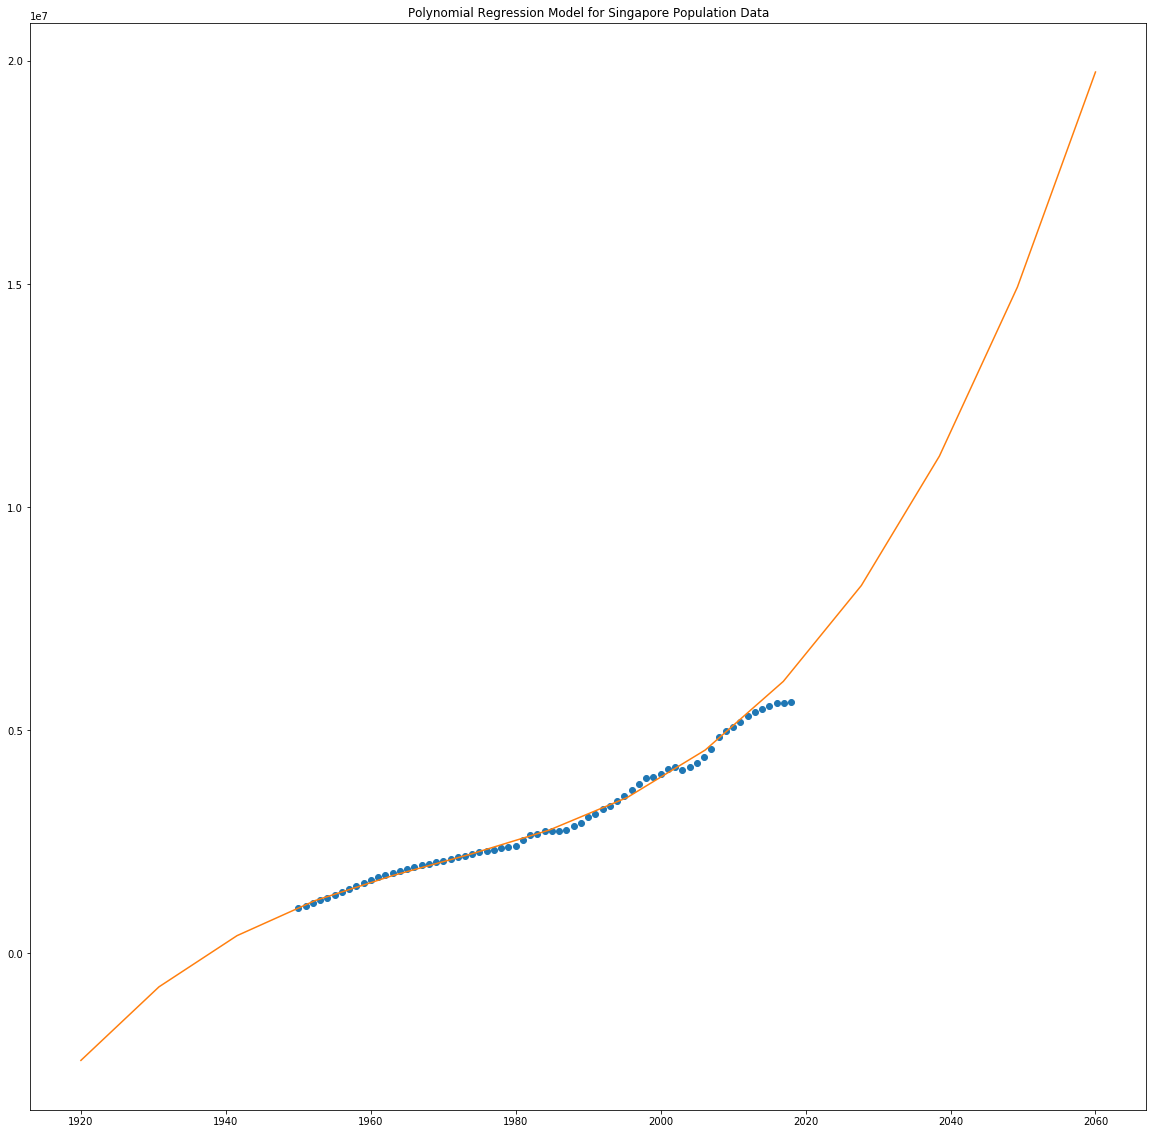

In [240]:
#try square root fitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model.fit(x_train, y_train)
yfit = poly_model.predict(x_lr)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(title='Polynomial Regression Model for Singapore Population Data')
ax.plot(x,y,'o')
ax.plot(x_lr,yfit)



In [241]:
#Try Ridge Regression

#import Ridge Regression model
ridge = lm.RidgeCV()

#convert dataframes into 1D arrays
x_tr=x_train.transpose()[0]
y_tr= y_train.transpose()[0]
x_lr=x_lr.transpose()[0]
x_test =x_test.transpose()[0]


55496493574.66468
321264097669.1065


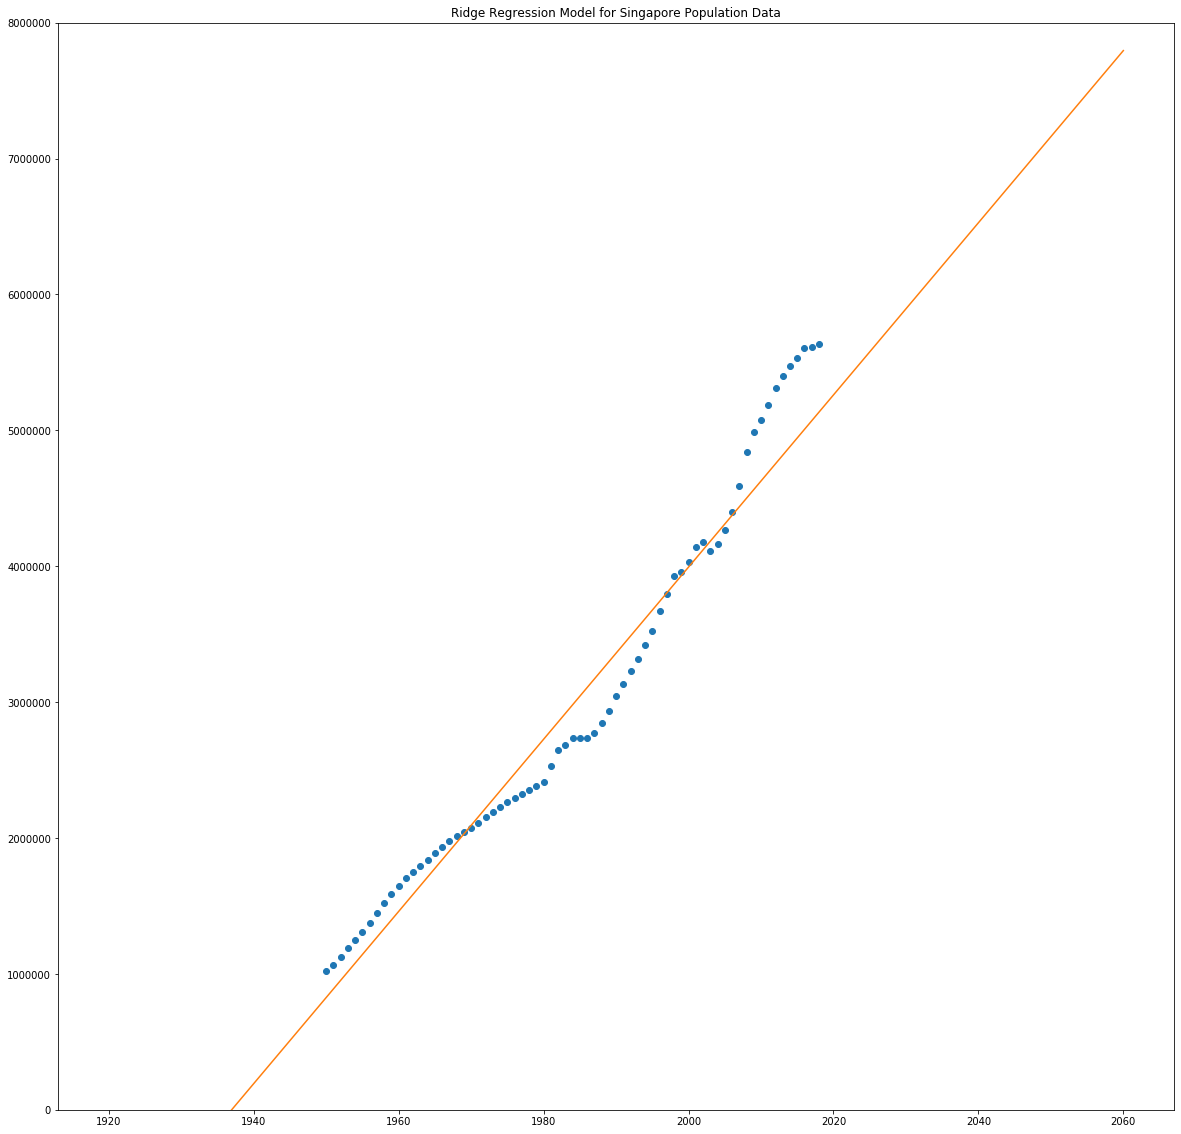

In [242]:
#plot ridge regression model
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(title='Ridge Regression Model for Singapore Population Data')
ax.plot(x,y,'o')

#train ridge regression model 
ridge.fit(np.vander(x_tr, 2), y_tr)
y_ridge = ridge.predict(np.vander(x_lr, 2))
ax.plot(x_lr, y_ridge)
ax.set_ylim(0, 8000000)

#check results on test and train data  
y_ridge = ridge.predict(np.vander(x_test,2))
yridge_pred = ridge.predict(np.vander(x_tr,2))

#save metric
ridge_train_metric= metrics.mean_squared_error(yridge_pred, y_tr)
print (ridge_train_metric)
ridge_test_metric = metrics.mean_squared_error(y_ridge, y_test)
print (ridge_test_metric)


In [243]:
#comparing MSE of Ridge regression and linear regression

metrics = [[linear_train_metric, ridge_train_metric], [linear_test_metric,ridge_test_metric]]
table3= pd.DataFrame(metrics, columns = ['Linear', 'Ridge']) 
table3


,Linear,Ridge
0,5.549649e+10,5.549649e+10
1,3.212528e+11,3.212641e+11


In [244]:
#Try changing train and test set

from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
y_train = np.asarray(y_train)
y_test =np.asarray(y_test)
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)
pred2 =lr.predict(X_train)

linear_train_metric1= metrics.mean_squared_error(pred2, y_train)
#linear_test_metric1= metrics.mean_squared_error(pred1, y_test)
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 


metrics1 = [[linear_train_metric, linear_train_metric1], [linear_test_metric,linear_test_metric1]]
table4= pd.DataFrame(metrics, columns = ['Original', 'Shuffled']) 
table4

AttributeError: 'list' object has no attribute 'mean_squared_error'

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandoc

     |████████████████████████████████| 491kB 6.5MB/s eta 0:00:01
  Stored in directory: /Users/jingru/Library/Caches/pip/wheels/d1/e8/71/bc3242b3e8f119c62eebdb0dee519fd40ac293e4835839db7c
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xelatex

  ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install texlive-xetex

  ERROR: Could not find a version that satisfies the requirement texlive-xetex (from versions: none)
ERROR: No matching distribution found for texlive-xetex
Note: you may need to restart the kernel to use updated packages.
